<a href="https://colab.research.google.com/github/MIKEL55/Forex_LSTM/blob/main/oct_16_Basic_Structure.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [8]:
import numpy as np
import pandas as pd
import yfinance as yf
import math
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout

In [2]:
origin_data=yf.download(tickers='EURUSD=X',start='2015-01-01',end='2020-12-31',interval ='1d')

[*********************100%***********************]  1 of 1 completed


In [6]:
#Preprocess the data
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(origin_data['Close'].values.reshape(-1, 1))

In [9]:
seq_len=60

In [12]:
X =[]
y =[]

for i in range(seq_len, len(scaled_data)):
  X.append(scaled_data[i-seq_len:i,0])
  y.append(scaled_data[i,0])

In [13]:
X,y = np.array(X), np.array(y)
X= np.reshape(X,( X.shape[0] ,X.shape[1] ,1))

In [14]:
train_len = math.ceil( len(X) *.8)
X_train, X_test = X[:train_len], X[train_len:]
y_train, y_test = y[:train_len], y[train_len:]

In [15]:
model = Sequential()
model.add(LSTM(units=50,return_sequences=True,input_shape=(X_train.shape[1], 1)))
model.add(Dropout(0.2))
model.add(LSTM(units=50,return_sequences=True))
model.add(Dropout(0.2))
model.add(LSTM(units=50,return_sequences=True))
model.add(Dropout(0.2))
model.add(LSTM(units=50))
model.add(Dropout(0.2))
model.add(Dense(units=1))

/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [16]:
model.compile(optimizer='adam', loss='mean_squared_error')

In [29]:
model.fit(X_train,y_train,epochs=100,batch_size=32)

Epoch 1/100
38/38 ━━━━━━━━━━━━━━━━━━━━ 4s 102ms/step - loss: 0.0019
Epoch 2/100
38/38 ━━━━━━━━━━━━━━━━━━━━ 5s 133ms/step - loss: 0.0016
Epoch 3/100
38/38 ━━━━━━━━━━━━━━━━━━━━ 4s 101ms/step - loss: 0.0019
Epoch 4/100
38/38 ━━━━━━━━━━━━━━━━━━━━ 4s 103ms/step - loss: 0.0016
Epoch 5/100
38/38 ━━━━━━━━━━━━━━━━━━━━ 6s 125ms/step - loss: 0.0018
Epoch 6/100
38/38 ━━━━━━━━━━━━━━━━━━━━ 4s 103ms/step - loss: 0.0016
Epoch 7/100
38/38 ━━━━━━━━━━━━━━━━━━━━ 4s 113ms/step - loss: 0.0017
Epoch 8/100
38/38 ━━━━━━━━━━━━━━━━━━━━ 5s 119ms/step - loss: 0.0017
Epoch 9/100
38/38 ━━━━━━━━━━━━━━━━━━━━ 4s 100ms/step - loss: 0.0016
Epoch 10/100
38/38 ━━━━━━━━━━━━━━━━━━━━ 7s 142ms/step - loss: 0.0015
Epoch 11/100
38/38 ━━━━━━━━━━━━━━━━━━━━ 9s 102ms/step - loss: 0.0018
Epoch 12/100
38/38 ━━━━━━━━━━━━━━━━━━━━ 6s 138ms/step - loss: 0.0016
Epoch 13/100
38/38 ━━━━━━━━━━━━━━━━━━━━ 9s 106ms/step - loss: 0.0016
Epoch 14/100
38/38 ━━━━━━━━━━━━━━━━━━━━ 6s 116ms/step - loss: 0.0015
Epoch 15/100
38/38 ━━━━━━━━━━━━━━━━━━━━ 4s 

In [30]:
predictions = model.predict(X_test)
predictions = scaler.inverse_transform(predictions)

10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


In [31]:
len(origin_data)

1562

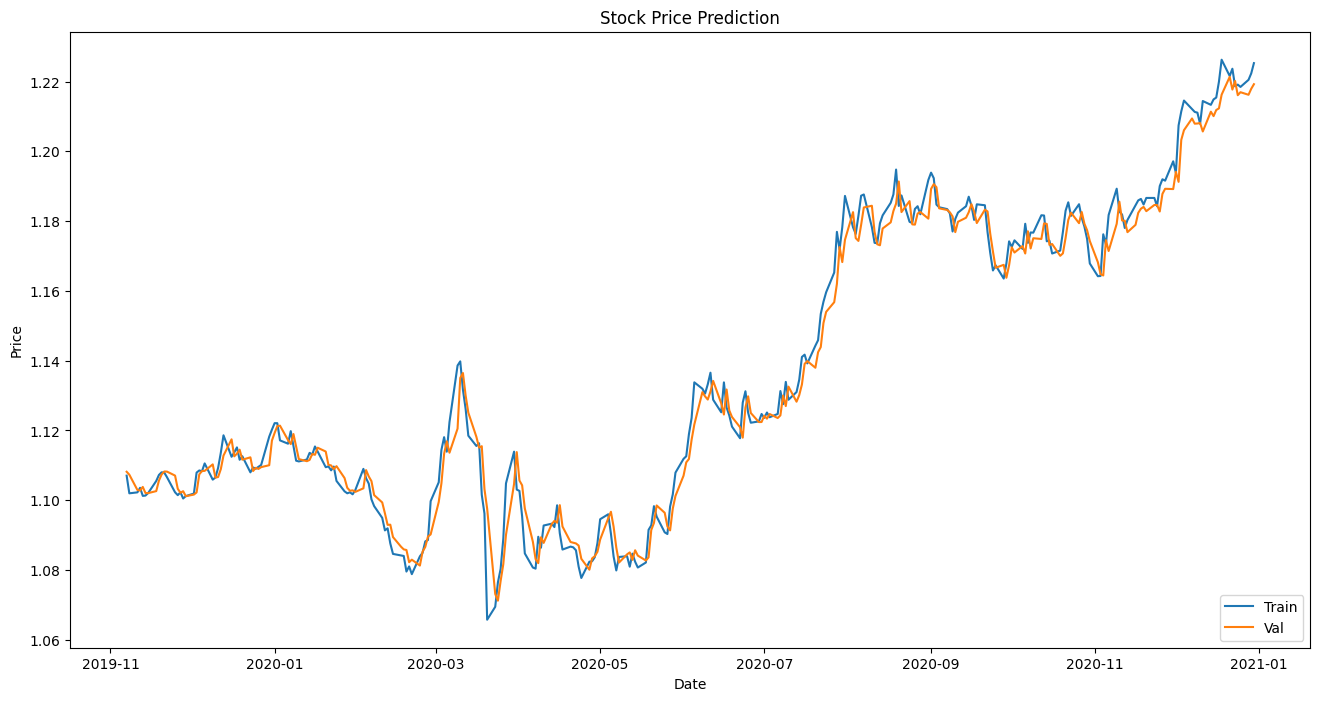

In [32]:
train = origin_data[:train_len]
valid = origin_data[train_len:].copy()
valid = valid[-len(predictions):]
valid['Predictions'] = predictions

plt.figure(figsize=(16, 8))
plt.title('Stock Price Prediction')
#plt.plot(train['Close'])
plt.plot(valid[['Close', 'Predictions']])
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend(['Train', 'Val', 'Predictions'], loc='lower right')
plt.show()

In [59]:
from sklearn.metrics import mean_squared_error,root_mean_squared_error
mse = mean_squared_error(valid['Close'], predictions)
print('MSE:', mse)

MSE: 2.9493390589342045e-05


In [60]:
rmse = root_mean_squared_error(valid['Close'], predictions)
print('RMSE:', rmse)

RMSE: 0.0054307817659469656


In [35]:
valid

,Open,High,Low,Close,Adj Close,Volume,Predictions
Date,,,,,,,
2019-11-07,1.107064,1.109139,1.103801,1.107040,1.107040,0,1.108155
2019-11-08,1.103460,1.103814,1.101780,1.101970,1.101970,0,1.107314
2019-11-11,1.102281,1.104362,1.101722,1.102244,1.102244,0,1.102927
2019-11-12,1.103485,1.104118,1.100388,1.103546,1.103546,0,1.102779
2019-11-13,1.101212,1.102050,1.100110,1.101237,1.101237,0,1.103805
...,...,...,...,...,...,...,...
2020-12-24,1.219393,1.221747,1.217938,1.219141,1.219141,0,1.216102
2020-12-25,1.218472,1.221300,1.216700,1.218472,1.218472,0,1.216960
2020-12-28,1.220703,1.225200,1.218353,1.220510,1.220510,0,1.216221


In [72]:
new_origin_data=yf.download(tickers='EURUSD=X',start='2022-05-01',end='2022-12-01',interval ='1d')

[*********************100%***********************]  1 of 1 completed


In [73]:
new_scaled_data = scaler.transform(new_origin_data['Close'].values.reshape(-1, 1))
x_test = []
y_test = []

for i in range(seq_len,len(new_scaled_data)):
  x_test.append(new_scaled_data[i-seq_len:i,0])
  y_test.append(new_scaled_data[i,0])
x_test = np.array(x_test)
y_test = np.array(y_test)
x_test = np.reshape(x_test, (x_test.shape[0],x_test.shape[1],1))

new_predictions = model.predict(x_test)
new_predictions = scaler.inverse_transform(new_predictions)

y_test_actual = scaler.inverse_transform(y_test.reshape(-1, 1))

3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step


In [77]:
mse2 = mean_squared_error(y_test_actual, new_predictions)
rmse = np.sqrt(mse)
print(f"Mean Squared Error: {mse}")
print(f"Root Mean Squared Error: {rmse}")



Mean Squared Error: 2.9493390589342045e-05
Root Mean Squared Error: 0.0054307817659469656


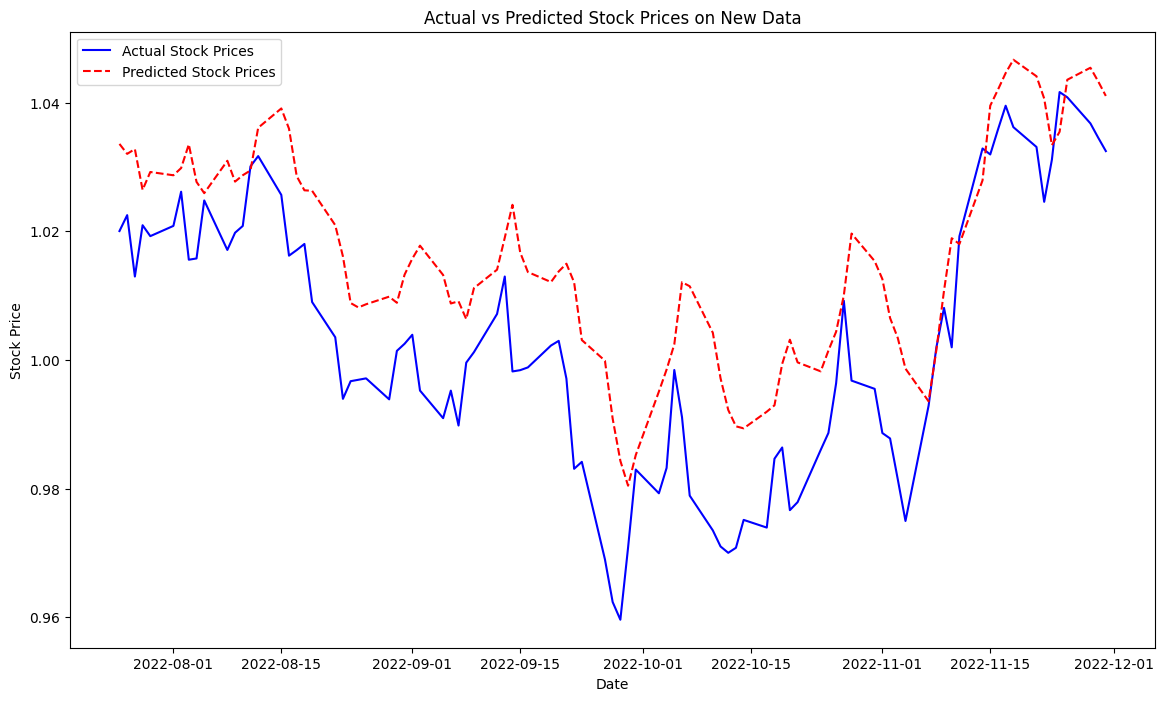

In [81]:
# Step 4: Plot the results
plt.figure(figsize=(14, 8))
plt.plot(new_origin_data.index[seq_len:], y_test_actual, color='blue', label='Actual Stock Prices')
plt.plot(new_origin_data.index[seq_len:], new_predictions, color='red', linestyle='--', label='Predicted Stock Prices')
plt.title('Actual vs Predicted Stock Prices on New Data')
plt.xlabel('Date')
plt.ylabel('Stock Price')
plt.legend()
plt.show()